# ¡Hola Carlos! 😊

Mi nombre es **Alejandro Castellanos** y hoy tengo el placer de ser el revisor de tu proyecto.

Voy a revisar todo tu código con detalle, buscando tanto los puntos fuertes como aquellos en los que podrías mejorar. Te dejaré comentarios a lo largo del notebook, destacando lo que has hecho bien y sugiriendo ajustes donde sea necesario. Si encuentro algún error, no te preocupes, te lo haré saber de forma clara y te daré información útil para que puedas corregirlo en la próxima iteración. Si en algún punto tienes comentarios, siéntete libre de dejarlos también.


Encontrarás mis comentarios específicos dentro de cajas verdes, amarillas o rojas, es muy importante que no muevas, modifiques o borres mis comentarios, con el fin de tener un seguimiento adecuado de tu proceso:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

A continuación te dejaré un comentario general con mi valoración del proyecto. **¡Mi objetivo es que sigas aprendiendo y mejorando con cada paso!**


------

<div class="alert alert-block alert-success">
<b>Comentario General del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Carlos, tu trabajo muestra una comprensión sólida en cada etapa del análisis, desde la limpieza de los datos hasta la interpretación de resultados. Destaca especialmente la forma en que abordaste la transformación de columnas y el análisis gráfico para explicar tendencias del mercado y comportamiento de los usuarios por región. También fue muy acertado tu manejo de las pruebas estadísticas, aunque sería importante que consideres evaluar previamente la homogeneidad de varianzas con una prueba como Levene, para asegurar la validez de tus conclusiones.

En general, desarrollaste un muy buen análisis en este caso de estudio, sigue manteniendo esta combinación de habilidades técnicas, analíticas y estratégicas en tus futuros proyectos.

¡Te deseo muchos éxitos en tu próximo Sprint! 🚀

*Estado del Proyecto:* **Aprobado**



</div>

------

***Carlos Andres Quintero Medina***

**Proyecto integrado analista de datos.**
    
*Venta de videojuegos en local "Ice".*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

# Ruta de datos
data_path = '/datasets/games.csv'
df = pd.read_csv(data_path)

display(df.head())
df.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Limpieza de datos

In [2]:
#Renombrar columnas
df.columns = df.columns.str.lower()

In [3]:
#LIMPIEZA DE DATOS
#Renombrar columnas
df.columns = df.columns.str.lower()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Muy buen trabajo importando las librerías y los datos del proyecto. Adicionalmente usaste correctamente las funciones `info` y `head`, esto te permite hacer una primera revisión de los datos, su estructura y contenido. 

Asimismo, es una excelente práctica convertir los nombres de las columnas a minúsculas para facilitar el trabajo posterior y evitar errores por tener una combinación de mayúsculas y minúsculas.

</div>

Remplazaramos tbd por NaN para asi tener un mejor control con los comandos que nos brinda python.

In [4]:
# Reemplaza 'tbd' por NaN en user_score
df['user_score'] = df['user_score'].replace('tbd', np.nan)

#Se convierte para tener variables nmumericas para evitar errores y facilitar la manipulacion
df['user_score'] = pd.to_numeric(df['user_score'])
df['critic_score'] = pd.to_numeric(df['critic_score'])

# Año a entero Int64 (algunos vienen como float) y los ocupamos como numeros enteros
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce').astype('Int64')

Eliminamos las filas con año de salida faltante, esto porque no podemos usar esa fila para análisis futuras.

In [5]:
#Eliminar filas con dato ausente en year_of_release
df = df.dropna(subset=['year_of_release']).reset_index(drop=True)

In [6]:
#Ventas totales
region_cols = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
df['total_sales'] = df[region_cols].sum(axis=1)

In [7]:
#Datos tras limpieza
display(df.head())
df.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16446 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.5+ MB


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Muy buen trabajo al limpiar y transformar los datos: conviertes correctamente las columnas numéricas y manejas con acierto los valores como 'tbd' y los ausentes en *year_of_release*

</div>

Analisis

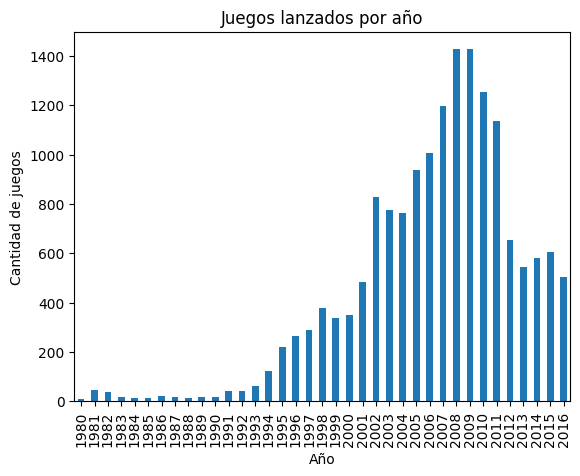

In [8]:
#Cantidad de juegos lanzados por año
games_per_year = df.groupby('year_of_release')['name'].count()
#Grafica
games_per_year.plot(kind='bar', title='Juegos lanzados por año')
plt.xlabel('Año'); plt.ylabel('Cantidad de juegos'); plt.show()

Podemos observar el pico maximo alrededor del 2006 al 2010 y una caida del 2011 hacia el 2016
Usaremos los años 2013 al 2016 para pronosticar el 2017, eso porque son los datos mas actuales y no varian tanto como el año 2011

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Muy buen trabajo! La gráfica muestra un crecimiento hasta 2008-2009, seguido de una caída en lanzamientos. Esto podría deberse al éxito de consolas como PS3 y Xbox 360, y luego a cambios en la industria: más enfoque en calidad, auge de juegos móviles, distribución digital o la crisis de 2008.

</div>

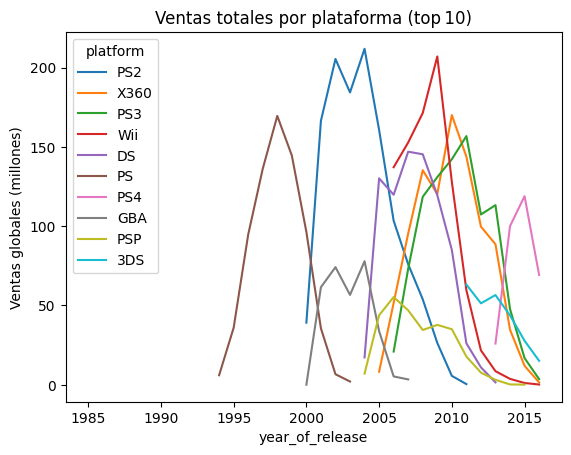

In [9]:
#Varianza de ventas entre plataformas de videojuegos. Se suma el total de ventas.
platform_pivot = df.pivot_table(
    index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

top_platforms = platform_pivot.sum().sort_values(ascending=False).head(10).index
platform_pivot[top_platforms].plot()
plt.title('Ventas totales por plataforma (top 10)')
plt.ylabel('Ventas globales (millones)')
plt.show()

Esta grafica es muy curiosa ya que podemos observar como las diferentes plataformas tienen alrededor de 8-10 años de vida
Mientras que ps4 y 3ds apenas empiezan sus ventas.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

El gráfico confirma que cada generación de consolas tiene un ciclo de vida (aproximadamente 5 años) con un período de auge y una posterior caída, lo que sugiere que el éxito de un videojuego está fuertemente vinculado al momento en el que es lanzado dentro de ese ciclo. 

</div>

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
Name: total_sales, dtype: float64

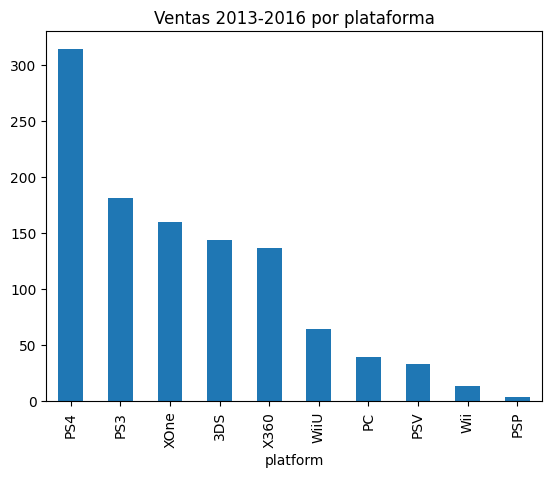

In [10]:
#Realizamos un analisis del 2013 para adelante para un mejor enfoque.
df_recent = df.query('year_of_release >= 2013')
recent_platform_sales = (df_recent.groupby('platform')['total_sales']
                         .sum().sort_values(ascending=False))

display(recent_platform_sales.head(10))
recent_platform_sales.head(10).plot(kind='bar')
plt.title('Ventas 2013‑2016 por plataforma')
plt.show()

Podemos observar como cambian los datos dependiendo del rango de años seleccionado, se observa como las consolas de nueva generacion suben sus ventas de forma rapida mientras que la generacion anterior se queda atras en ventas acorde pasan los años

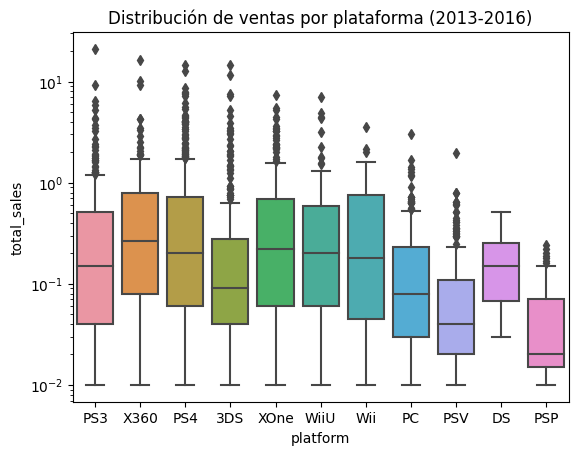

In [11]:
#Diagrama de dispersion de ventas
sns.boxplot(data=df_recent, x='platform', y='total_sales')
plt.yscale('log')  # ventas muy dispersas
plt.title('Distribución de ventas por plataforma (2013‑2016)')
plt.show()

PS4, XOne, WiiU y Wii suelen vender mas porque sus cajas son mas largas determinando un rango mayor de ventas.
PC, DS, PSP y PSV Tienen la mediana baja, quiere decir que tiene menos ventas por juego.
Todos empiezan con una cola baja de ventas pero pocos alcanzan una cola alta.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Muy buen trabajo obteniendo los *box-plot*. Estos muestran que la mayoría de los juegos tienen ventas bajas, hay valores extremos que dominan en cada plataforma. Esto muestra que el éxito de un juego no depende solo de la consola, sino también de su popularidad y estrategia de marketing.

</div>

Ejemplo
Como afectan las reseñas de usuarios y profesionales a la compra de las plataformas?

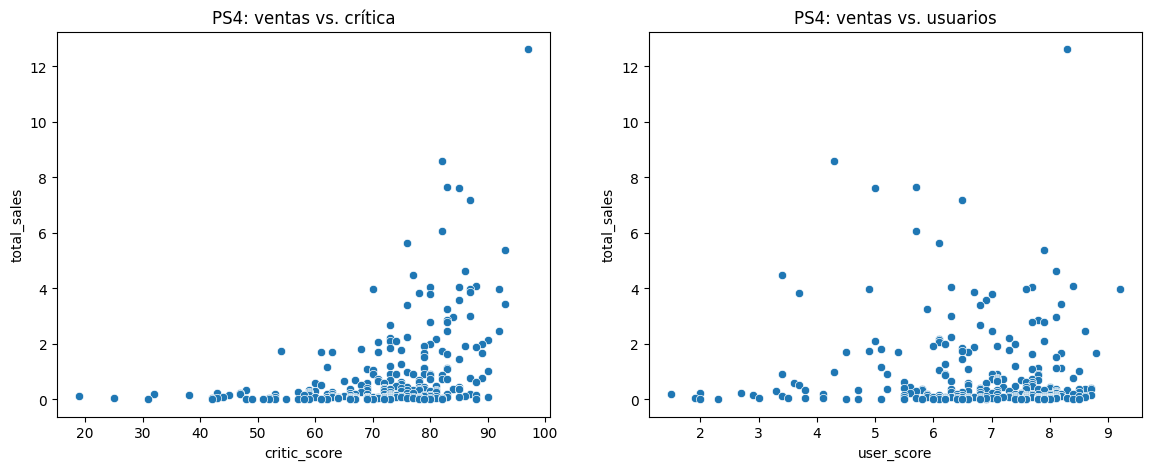

Correlación Critica → Ventas: 0.41
Correlación Usuario → Ventas  : -0.03


In [12]:
ps4 = df_recent.query('platform == "PS4"')
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.scatterplot(data=ps4, x='critic_score', y='total_sales', ax=ax[0])
ax[0].set_title('PS4: ventas vs. crítica')
sns.scatterplot(data=ps4, x='user_score', y='total_sales', ax=ax[1])
ax[1].set_title('PS4: ventas vs. usuarios')
plt.show()

print('Correlación Critica → Ventas:', ps4['critic_score'].corr(ps4['total_sales']).round(2))
print('Correlación Usuario → Ventas  :', ps4['user_score'].corr(ps4['total_sales']).round(2))

Podemos ver que la critica profesional suele inlfuir mas en las ventas, mientras que la de los usuarios es muy debil.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Genial, Con esta información se evidencia que la puntuación de los críticos está un poco más relacionada con las ventas que la de los usuarios, aunque la correlación es débil. En User_Score no hay una tendencia clara, pero en Critic_Score, los juegos mejor calificados tienden a vender más. Esto sugiere que las críticas especializadas pueden tener mayor impacto en las ventas.

</div>

Ahora analicemos la venta de juegos por genero.

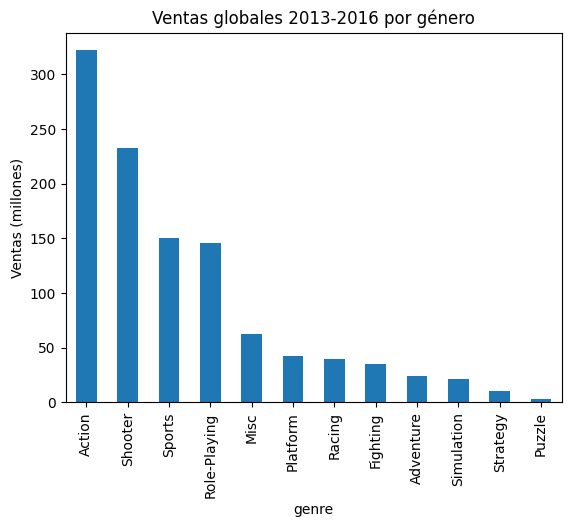

In [13]:
genre_sales = (df_recent.groupby('genre')['total_sales']
               .sum().sort_values(ascending=False))

genre_sales.plot(kind='bar')
plt.title('Ventas globales 2013‑2016 por género')
plt.ylabel('Ventas (millones)')
plt.show()

Los juegos de genero de action, shooter, sports y role-playing son los que dominan en ventas.
Simulation, strategy y puzzle venden menos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Excelente trabajo! Se ve claramente que los juegos de acción y deportes lideran en ventas. Los géneros de rol y shooter también destacan, aunque en menor medida. En cambio, los de estrategia, aventura y puzzle muestran ventas más bajas, lo que indica una demanda más limitada.

</div>

Perfil para cada región.

In [14]:
#Top 5 plataformas en cada región
def top5(col):
    return (df_recent.groupby('platform')[col].sum()
            .sort_values(ascending=False).head(5))

top_na = top5('na_sales')
top_eu = top5('eu_sales')
top_jp = top5('jp_sales')

pd.concat([top_na, top_eu, top_jp], axis=1, keys=['NA', 'EU', 'JP'])

,NA,EU,JP
platform,,,
PS4,108.74,141.09,15.96
XOne,93.12,51.59,NaN
X360,81.66,42.52,NaN
PS3,63.50,67.81,23.35
3DS,38.20,30.96,67.81
PSV,NaN,NaN,18.59
WiiU,NaN,NaN,10.88


In [15]:
#Top 5 géneros en cada región
def top5_genre(col):
    return (df_recent.groupby('genre')[col].sum()
            .sort_values(ascending=False).head(5))

pd.concat([top5_genre('na_sales'),
           top5_genre('eu_sales'),
           top5_genre('jp_sales')], axis=1, keys=['NA', 'EU', 'JP'])

,NA,EU,JP
genre,,,
Action,126.05,118.13,40.49
Shooter,109.74,87.86,6.61
Sports,65.27,60.52,NaN
Role-Playing,46.40,36.97,51.04
Misc,27.49,NaN,9.20
Racing,NaN,20.19,NaN
Fighting,NaN,NaN,7.65


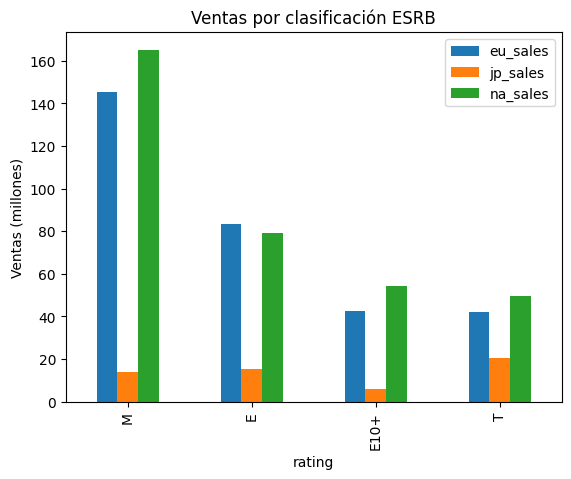

In [16]:
#Influencia del ESRB en ventas regionales
rating_pivot = df_recent.pivot_table(
    index='rating', values=['na_sales', 'eu_sales', 'jp_sales'],
    aggfunc='sum').fillna(0).sort_values(by='na_sales', ascending=False)

rating_pivot.plot(kind='bar')
plt.title('Ventas por clasificación ESRB')
plt.ylabel('Ventas (millones)')
plt.show()

En NA las clasificaciones M y T dominan.  
En JP la falta de clasificación (NaN) y E tienen mayor peso.  

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Carlos has logrado identificar claramente las diferencias entre América del Norte, Europa y Japón, no solo en términos de plataformas y géneros predominantes, sino también en la influencia de las clasificaciones ESRB, lo que refleja tu capacidad para conectar datos con tendencias culturales y de comportamiento. 

</div>

Prueba de hipotesis

Hipotesis #1 - Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [20]:
alpha = 0.05

xone_scores = df_recent.query('platform == "XOne"')['user_score'].dropna()
pc_scores   = df_recent.query('platform == "PC"')['user_score'].dropna()

# Welch's t‑test
tstat, pval = st.ttest_ind(xone_scores, pc_scores, equal_var=False)
print(f'p-value = {pval:.3f}')

if pval < alpha:
    print('Rechazamos hipotesis: las medias son diferentes.')
else:
    print('No se rechaza la hipotesis: medias iguales.')

p-value = 0.148
No se rechaza la hipotesis: medias iguales.


En promedio, los usuarios valoran de forma similar los juegos en ambas plataformas.

Hipotesis #2 - Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [22]:
action_scores  = df_recent.query('genre == "Action"')['user_score'].dropna()
sports_scores  = df_recent.query('genre == "Sports"')['user_score'].dropna()

tstat, pval = st.ttest_ind(action_scores, sports_scores, equal_var=False)
print(f'p-value = {pval:.3f}')

if pval < alpha:
    print('Rechazamos H0: las medias son diferentes.')
else:
    print('No se rechaza H0: medias iguales.')

p-value = 0.000
Rechazamos H0: las medias son diferentes.


Los usuarios valoran de forma distinta los juegos de Acción y de Deportes.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Carlos aplicaste correctamente las prueba de hipótesis comparando las distribuciones dos muestras independientes e interpretando de manera acertada el *p-value* obtenido y su relación con la hipótesis nula

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Te recomiendo realizar previamente una prueba de [Levene](https://www.educaopen.com/digital-lab/blog/educacion-digital/prueba-de-levene) para evaluar la igualdad de las varianzas, lo que te permitirá configurar adecuadamente el parámetro **equal_var** en la función `ttest_ind`. Esto servirá para tener una interpretación más precisa de los resultados además garantizará que la prueba t sea estadísticamente válida.


</div>

</div>

***Conclusiones***
1. **Plataformas rentables 2017**: PS4 y XOne seguirán liderando; 3DS‑Switch mostrarán crecimiento.
2. **Géneros**: Action y Shooter continúan dominando ingresos; Sports y Adventure son nichos rentables.
3. **Regiones**:
   * NA/EU: alto consumo de juegos M y T, apuesta por consolas de sobremesa.
   * JP: fuerte en portátiles, géneros Role‑Playing y Fighting más populares.
4. **Reseñas**: la crítica profesional influye más que el público en ventas.